# 回归分析

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

导入数据：

In [25]:
diabetes = datasets.load_diabetes()
# 只取数据集第3列作为因变量数据
# diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_X = diabetes.data

In [26]:
# 将数据划分为训练集和测试集
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

## 1. 普通最小二乘法

构建模型：

In [27]:
reg = linear_model.LinearRegression()

训练模型：

In [28]:
reg.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

对测试数据集进行预测：

In [29]:
diabetes_y_pred = reg.predict(diabetes_X_test)

回归系数：

In [30]:
reg.coef_

array([  3.03499549e-01,  -2.37639315e+02,   5.10530605e+02,
         3.27736980e+02,  -8.14131709e+02,   4.92814588e+02,
         1.02848452e+02,   1.84606489e+02,   7.43519617e+02,
         7.60951722e+01])

截距项：

In [31]:
reg.intercept_

152.76430691633442

均方差：

In [32]:
mean_squared_error(diabetes_y_test, diabetes_y_pred)

2004.5676026898211

模型得分：

In [33]:
r2_score(diabetes_y_test, diabetes_y_pred)

0.58507530226905735

## 2. 岭回归

构建岭回归模型：

In [34]:
reg = linear_model.Ridge(alpha=0.5, normalize=True)
reg.fit(diabetes_X_train, diabetes_y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

对测试数据集进行预测

In [35]:
diabetes_y_pred = reg.predict(diabetes_X_test)

回归系数

In [36]:
reg.coef_

array([  26.66665999, -130.9015535 ,  377.85929784,  246.47462955,
        -16.46777194,  -56.73552756, -179.39374153,  124.3070593 ,
        319.22920459,  117.36273727])

截距项：

In [37]:
reg.intercept_

152.93660729576612

均方差：

In [38]:
mean_squared_error(diabetes_y_test, diabetes_y_pred)

2370.5909888990982

模型得分（拟合优度）：

In [39]:
r2_score(diabetes_y_test, diabetes_y_pred)

0.5093122585674873

比较不同alpha值下的回归系数：

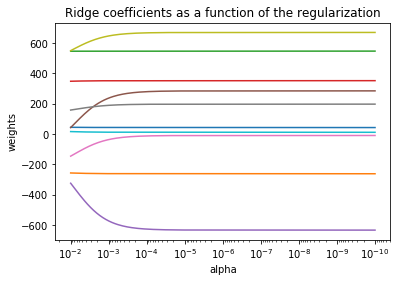

In [40]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False, normalize=True)
    ridge.fit(diabetes_X_train, diabetes_y_train)
    coefs.append(ridge.coef_)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

设置正则化参数alpha，即交叉验证自动选择最优alpha建立模型

In [41]:
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
reg.fit(diabetes_X_train, diabetes_y_train)AA
reg.alpha_

0.10000000000000001

In [42]:
reg.coef_

array([  11.1136556 , -204.19946801,  480.69629861,  303.83348865,
        -88.06728559,  -66.87260956, -193.14729968,  119.53475526,
        430.10894133,   95.56293006])

对比：

In [44]:
reg = linear_model.Ridge(alpha=0.1)
reg.fit(diabetes_X_train, diabetes_y_train)
reg.coef_

array([  11.1136556 , -204.19946801,  480.69629861,  303.83348865,
        -88.06728559,  -66.87260956, -193.14729968,  119.53475526,
        430.10894133,   95.56293006])

## 3. Lasso回归

手动设置alpha，建立模型：

In [46]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit(diabetes_X_train, diabetes_y_train)
reg.coef_

[   0.         -153.88667105  508.67446975  281.35649556  -51.0115067    -0.
 -219.74128855    0.          469.11520313   46.03782743]


通过交叉验证，自动设置alpha，建立模型：

In [49]:
reg = linear_model.LassoCV()
reg.fit(diabetes_X_train, diabetes_y_train)
print(reg.alpha_)
reg.coef_

0.0346286796426


array([   0.        , -204.39940687,  515.96287229,  308.90486341,
       -134.69542498,   -0.        , -207.64361595,   39.0260751 ,
        504.19981308,   69.21396092])

基于最小角回归算法的lasso回归：

In [52]:
reg = linear_model.LassoLars(alpha=0.0427613759102)
reg.fit(diabetes_X_train, diabetes_y_train)
reg.coef_

array([   0.        , -198.45750306,  514.94326768,  305.24347792,
       -114.00546204,    0.        , -224.68900625,   14.60543385,
        500.4665208 ,   67.41413512])

In [55]:
reg = linear_model.LassoLarsCV()
reg.fit(diabetes_X_train, diabetes_y_train)
print(reg.alpha_)
reg.coef_

0.0427613759102


array([   0.        , -198.45750306,  514.94326768,  305.24347792,
       -114.00546204,    0.        , -224.68900625,   14.60543385,
        500.4665208 ,   67.41413512])